## import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [7]:
df = pd.read_csv('titanic.csv')

In [5]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [8]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Data Cleaning

### 1) check for duplicates and handle them
### 2) check for missing values and handle them
### 3) check for invalid datatypes and handle them
### 4) Remove the unwanted columns

In [14]:
df.duplicated().any() # no duplicates are exists

False

In [15]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

### age,fare - *mean/median/zero*
### embarked - *mode/unknown*
### cabin - *drop the column/unknown*

<Axes: xlabel='age'>

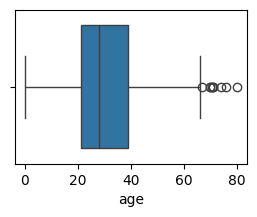

In [16]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'age')

<Axes: xlabel='fare'>

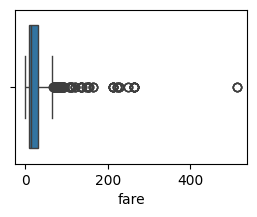

In [21]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'fare')

In [26]:
df.describe()
# mean --> average
# median --> middle
# mode --> most occured

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.503183,0.498854,0.385027,33.281082,0.381971
std,0.837836,12.905246,1.041658,0.865560,51.741501,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [25]:
df['age'] = df['age'].fillna(28.0) # median(50%) -- df['age'].median() ---> fillna works with series
df['fare'] = df['fare'].fillna(14.45) # median(50%) -- df['fare'].median()

In [ ]:
df['embarked'].mode() # return type is series

0    S
Name: embarked, dtype: object

In [36]:
# --- IGNORE --- index
m = df['embarked'].mode()[0] # 'S'
df['embarked'] = df['embarked'].fillna(m)

In [38]:
df.info() # everything is handled except cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [42]:
# df.dropna(axis=1,inplace=True) # drop the cabin column
df = df.dropna(axis = 1)
df # return type is dataframe

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


### there is no invaid datatype in this dataset Data Cleaning step is done

## Data Transformation (Feature Engineering)

### 1) create the new columns from an exisiting columns for data analysis
### 2) Remove the unwanted columns after feature engineering

## Data Analysis

### 1) Analysis Using Pandas
### 2) Analysing using visuals (matplotlib and seaborn)

## conclusion